In [6]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data1 = Path("../SQL Extract/project_data.csv")
df = pd.read_csv(data1)
df.head()


,Date,Index,TA.OVH.RECYCLE.NC4.VOLPCT,RX.TB.RECYCLE.CHARGE.BPD,RX.TB.RECYCLE.CHARGE.PCT,RX.NORTH.TC.CHARGE.BPD,RX.NORTH.TC.CHARGE.CV.PCT,RX.NORTH.FLUSH.PSIG,RX.NORTH.OUT.F,RX.SOUTH.TA.RECYCLE.CHARGE.BPD,...,TC.TRAY7.F,TC.TRAY40.F,TC.CHARGE.F,TC.OVHD.PSIG,TC.OVHD.RECVR.F,TC.TRAY24.F,TC.DP.PSIG,TC.BTM.PSIG,TC.REBOIL.OUT.F,TC.REBOIL.COND.LBHR
0,7/15/22 13:00,0,11.2,2129.646240,18.0,2675.764893,18.639069,154.651001,98.298904,6399.555664,...,189.015198,200.230911,185.963440,225.736343,171.159378,171.122482,3.474795,229.263306,201.866669,7962.539063
1,7/15/22 6:00,1,13.9,2272.000000,18.0,2525.604736,16.987556,154.997070,94.095535,6395.504883,...,188.524796,200.025757,183.010101,225.407928,170.034485,166.026642,3.497400,228.925705,201.666885,8235.396484
2,7/14/22 13:00,2,13.6,2201.021484,18.0,2205.657471,13.894874,154.587738,97.244797,5933.965332,...,189.106735,200.470154,184.994659,225.509613,170.889282,172.314682,3.255728,228.812592,202.100235,7684.425293
3,7/14/22 6:00,3,11.0,2298.876953,18.0,2419.370850,15.557940,153.091431,94.886169,5902.112793,...,189.208466,200.854492,183.828537,227.577850,168.273529,167.599670,3.341954,230.949127,202.447525,7940.173828
4,7/13/22 13:00,4,10.7,2269.168213,18.0,2569.280518,17.275063,149.634552,99.748436,5749.198730,...,188.840515,200.381729,185.034378,226.513702,168.064575,172.359161,3.218659,229.778030,202.280701,7591.852539


In [10]:
 ## Separate the Features (X) from the Target (y)
y = df["TA.OVH.RECYCLE.NC4.VOLPCT"]
X = df.drop(["TA.OVH.RECYCLE.NC4.VOLPCT", "Date", "Index"], axis = 1)

## Split into train data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
X_train.shape

# Import Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)



,Prediction,Actual
0,10.014080,10.600000
1,9.856864,9.200000
2,10.059915,10.400000
3,13.852045,12.900000
4,14.323265,13.200000
5,14.055454,14.700000
6,13.933272,15.400000
7,10.679582,13.100000
8,17.215157,12.400000
9,12.997188,12.400000


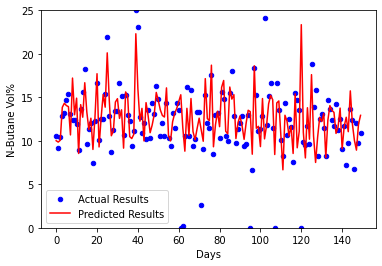

In [11]:
# Plot Results
# Create X-Axis for y
plot_df=pd.DataFrame(results)
count = []
i=0
for value in plot_df['Actual']:
    count.append(i)
    i=i+1
plot_df["Count"] = count  
plot_df.head()
plot_df["Actual"] = pd.to_numeric(plot_df["Actual"])
plot_df.dtypes
df = plot_df.head(150)
# Plot
ax = df.plot(kind="scatter", x="Count",y="Actual", color="b", label="Actual Results")
df.plot(x="Count",y="Prediction", color="r", label="Predicted Results", ax=ax)


ax.set_xlabel("Days")
ax.set_ylabel("N-Butane Vol%")
ax.set_ylim(0,25)
plt.show()


In [12]:
results_df = pd.DataFrame(results)
variation = abs(results_df["Actual"] - results_df["Prediction"])
results_df['Variation Vol%']=variation
total_variation = results_df['Variation Vol%'].mean()

accuracy = (results_df["Actual"].astype(float)/results_df["Prediction"].astype(float))*100
results_df['Accuracy']=accuracy
total_accuracy = results_df['Accuracy'].astype(float).mean()

# total_accuracy
print(" The average variation is " ,total_variation, "Vol% Points, the average accuracy is " ,total_accuracy, "%")

 The average variation is  1.9177693823501651 Vol% Points, the average accuracy is  99.43974573707439 %


In [13]:
# Compute pairwise correlation of columns
# DataFrame.corr(method='pearson', min_periods=1)[source]
# Compute pairwise correlation of columns, excluding NA/null values.

# Parameters
# method{‘pearson’, ‘kendall’, ‘spearman’} or callable
# Method of correlation:
# pearson : standard correlation coefficient
# kendall : Kendall Tau correlation coefficient
# spearman : Spearman rank correlation
# callable: callable with input two 1d ndarrays
# and returning a float. Note that the returned matrix from corr will have 1 along the diagonals and will be symmetric regardless of the callable’s behavior.
# min_periodsint, optional
# Minimum number of observations required per pair of columns to have a valid result. Currently only available for Pearson and Spearman correlation.

df.corr(method='pearson', min_periods=1)



,Prediction,Actual,Count
Prediction,1.000000,0.442797,-0.157225
Actual,0.442797,1.000000,-0.134937
Count,-0.157225,-0.134937,1.000000
